# Mid-semester assignment Part 2 - Basics of deep learning
Hello dear students,<br> this is the template notebook. Please copy it into your drive and open as Google Colab nootebook".

---
<br>

### Name and ID:
Student 1: Ofir Almog 207918731
<br>
Student 2: Adir Edri 206991762

## Sign Language Digits With PyTorch
Sign Language Digits dataset contains 5,000 grayscale images in 10 categories. The images show individual articles of hand sign at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://www.researchgate.net/publication/344389112/figure/fig8/AS:941467451260937@1601474740275/Sample-images-from-ASL-with-digits-dataset.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>





The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of numbers ranging from '0' to '9'. These correspond to the *class* of hand sign digit the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Hand Sign Zero</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Hand Sign One</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Hand Sign Two</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Hand Sign Three</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Hand Sign Four</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Hand Sign Five</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Hand Sign Six</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Hand Sign Seven</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Hand Sign Eight</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Hand Sign Nine</td>
  </tr>
</table>

<br>

# Goodluck!

# Neural Network with PyTorch part 1 (Binary Classification)

## Import Libraries

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

## Dwonload Dataset

In [ ]:
%%capture
!pip install ipython-autotime
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1-0fhqH8tXKPb60C_b4aUHT7f-J4O6Ezq
%load_ext autotime

time: 369 µs (started: 2025-01-12 16:00:56 +00:00)


Loading the dataset as NumPy arrays:

* The `dataset` file is a NumPy array containing the image pixles. As you can see, it includes 5,000 rows for each image and 784 columns for each pixel in the image (28x28).
* The `labels` file is a NumPy array containing the images labels. As you can see, it includes 5,000 rows for each image corresponding to the dataset.

In [ ]:
loaded_data = np.load('/content/dataset_labels.npz')
X, y = loaded_data['dataset'], loaded_data['labels']
print(f'Dataset shape: {X.shape}\nLabels shape: {y.shape}')

Dataset shape: (5000, 784)
Labels shape: (5000,)
time: 47.8 ms (started: 2025-01-12 16:00:56 +00:00)


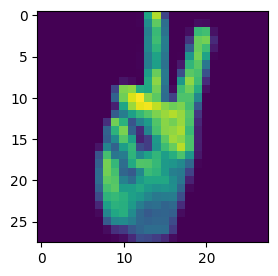

time: 174 ms (started: 2025-01-12 16:00:56 +00:00)


In [ ]:
plt.figure(figsize=(3, 3))
plt.imshow(X[1000].reshape(28,28))
plt.show()

## Data preprocessing
There is no obligation to use the "hints" I left here for the benefit of the pre-processing stage. If you have another way that is more convenient for this step, then you are welcome to use it.

### Feature scaling

In [ ]:
X = X / 255.0

time: 15.1 ms (started: 2025-01-12 16:00:56 +00:00)


### Select two classes

In [ ]:
#TODO: select two classes (for example 2-Pullover and 4-Coat)

# Display original unique values in the dataset
print("Original label values:", np.unique(y))

class_1, class_2 = '7', '6'
mask = (y == class_1) | (y == class_2)   # Create boolean mask for the selected classes
X = X[mask]
y = y[mask]

# Convert to binary classification (0 and 1)
y = (y == class_2).astype(int)

# Print information after processing, shapes of data and labels, and distribution of binary labels
print("\nAfter selection:")
print("X shape:", X.shape)
print("Y shape:", y.shape)
print("Binary label distribution:", np.unique(y, return_counts=True))

Original label values: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']

After selection:
X shape: (1000, 784)
Y shape: (1000,)
Binary label distribution: (array([0, 1]), array([500, 500]))
time: 12.2 ms (started: 2025-01-12 16:00:56 +00:00)


Use Pytorch data tools to preprocessed the row data<br>
Read about pytorch data tools here: https://pytorch.org/docs/stable/data.html

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, random_split

# Convert NumPy data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# Create a dataset combining features and labels
dataset = TensorDataset(X_tensor, y_tensor)

# Split the dataset into training and testing sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders for batch processing
train_loader = DataLoader(train_dataset, batch_size=32, sampler=RandomSampler(train_dataset))
test_loader = DataLoader(test_dataset, batch_size=32, sampler=RandomSampler(test_dataset))

print(f"Training set size: {len(train_dataset)}")
print(f"Testing set size: {len(test_dataset)}")

Training set size: 800
Testing set size: 200
time: 67.6 ms (started: 2025-01-12 16:00:56 +00:00)


### Build the network layers
Read about Fully connected layers in pytorch here: https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

In [ ]:
from torch import nn
import torch.nn.functional as F

class NeuralNetwork(nn.Module):
  def __init__(self):
       # Initialize the parent class
       super(NeuralNetwork, self).__init__()
       # Input layers : 784 --> 64 , 64 --> 1, fully connected
       self.input_layer = nn.Linear(784, 64)
       self.output_layer = nn.Linear(64, 1)  # hidden

  def forward(self, x):
       # Apply ReLU & sigmoid activations to the layers
       x = F.relu(self.input_layer(x))
       x = torch.sigmoid(self.output_layer(x)) #sigmoid activation function for binary classification
       return x

time: 872 µs (started: 2025-01-12 16:00:56 +00:00)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (input_layer): Linear(in_features=784, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
)
time: 337 ms (started: 2025-01-12 16:00:56 +00:00)


### Build the Optimizer
Read about the Optimizer here: https://pytorch.org/docs/stable/optim.html

In [ ]:
from torch import optim
optimizer = optim.Adam(model.parameters(), lr=0.01)

time: 7.45 s (started: 2025-01-12 16:00:56 +00:00)


### Loss Function
Read about Loss here: https://pytorch.org/docs/stable/optim.html

In [ ]:
loss = nn.BCELoss()
criterion = nn.BCELoss()  # binary cross entropy

time: 676 µs (started: 2025-01-12 16:01:04 +00:00)


### Training
Train your model, Don't forget to store the "loss" and "Accuracy" while training, you will have to show them later.<br>
Read about Loss here: https://pytorch.org/tutorials/beginner/introyt/trainingyt.html

In [ ]:
numner_of_epochs = 40

eval_losses = []  # Track losses
eval_accu = []    # Track accuracies

for epoch in range(numner_of_epochs):  # Epoch loop
    avg_epoch_loss = 0
    correct_predictions = 0
    total_predictions = 0

    for batch_X, batch_y in train_loader:  # Batch processing
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        optimizer.zero_grad()  # Prepare for gradient calculation
        outputs = model(batch_X)  # Forward pass
        loss = criterion(outputs, batch_y)  # Calculate loss

        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        # Accuracy calculation
        predicted = (outputs > 0.5).float()
        correct_predictions += (predicted == batch_y).sum().item()
        total_predictions += batch_y.size(0)

        avg_epoch_loss += loss.item()

    # Compute epoch metrics
    avg_epoch_loss /= len(train_loader)
    accuracy = correct_predictions / total_predictions

    # Store results
    eval_losses.append(avg_epoch_loss)
    eval_accu.append(accuracy)

    # Progress tracking
    print(f"Epoch {epoch}, Loss: {avg_epoch_loss}, Accuracy: {accuracy}")

Epoch 0, Loss: 0.34377125918865203, Accuracy: 0.86375
Epoch 1, Loss: 0.12447649836540223, Accuracy: 0.9625
Epoch 2, Loss: 0.06601067956537009, Accuracy: 0.98
Epoch 3, Loss: 0.0325941357575357, Accuracy: 0.99375
Epoch 4, Loss: 0.01602095696143806, Accuracy: 0.9975
Epoch 5, Loss: 0.014752343697473407, Accuracy: 0.99875
Epoch 6, Loss: 0.006490384774515405, Accuracy: 0.99875
Epoch 7, Loss: 0.004839647978078574, Accuracy: 1.0
Epoch 8, Loss: 0.005474056313978508, Accuracy: 0.99875
Epoch 9, Loss: 0.0016828407440334558, Accuracy: 1.0
Epoch 10, Loss: 0.000873208026168868, Accuracy: 1.0
Epoch 11, Loss: 0.0006157872956828215, Accuracy: 1.0
Epoch 12, Loss: 0.0005243529070867225, Accuracy: 1.0
Epoch 13, Loss: 0.0004756320142769255, Accuracy: 1.0
Epoch 14, Loss: 0.00043625204780255443, Accuracy: 1.0
Epoch 15, Loss: 0.0003789626475190744, Accuracy: 1.0
Epoch 16, Loss: 0.00034402443445287646, Accuracy: 1.0
Epoch 17, Loss: 0.0003188661305466667, Accuracy: 1.0
Epoch 18, Loss: 0.000297309817688074, Accur

### Loss and Accuracy Visualization
Show  on plot the lose during training

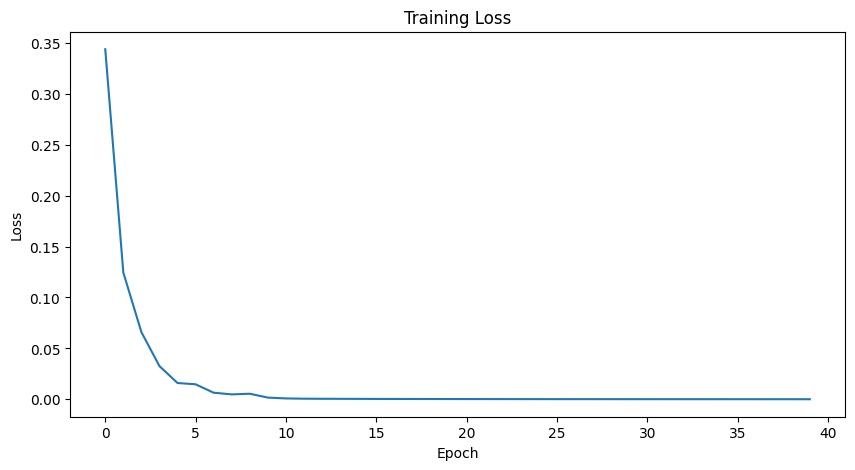

time: 506 ms (started: 2025-01-12 16:01:09 +00:00)


In [ ]:
import matplotlib.pyplot as plt

# Create epoch list to match the number of epochs
epoch_list = list(range(len(eval_losses)))

plt.figure(figsize=(10, 5))
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(epoch_list, eval_losses)
plt.show()

Show  on plot the accuracy during training

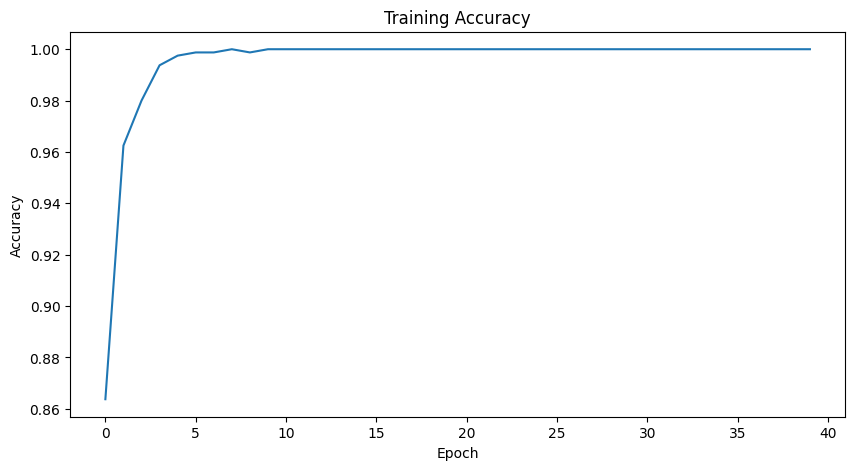

time: 359 ms (started: 2025-01-12 16:01:10 +00:00)


In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(range(len(eval_accu)), eval_accu)
plt.show()

### Test
Test your model (Show accuracy by comparing the prediction VS the test label)

In [ ]:
from sklearn.metrics import accuracy_score

model.eval()
with torch.no_grad():
    y_pred = []
    y_true = []
    for X, y in test_loader:
        X, y = X.to(device), y.to(device)
        pred = (model(X) > 0.5).float()
        y_pred.extend(pred.cpu().numpy())
        y_true.extend(y.cpu().numpy())

accuracy = accuracy_score(y_true, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 1.0000
time: 50.9 ms (started: 2025-01-12 16:01:10 +00:00)


### Model Evaluation
Show the model evaluation by presenting the confusion metrix in a representative way<br>
Read about confusion metrix visualization here: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

<Figure size 800x600 with 0 Axes>

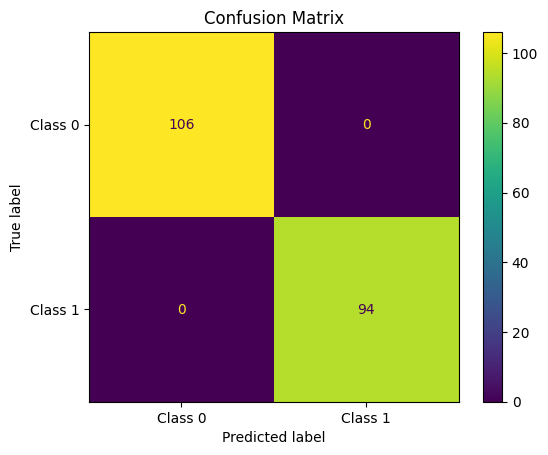

True Negatives: 106
False Positives: 0
False Negatives: 0
True Positives: 94
time: 374 ms (started: 2025-01-12 16:01:10 +00:00)


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visual display of the matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Print additional metrics
print(f'True Negatives: {cm[0][0]}')
print(f'False Positives: {cm[0][1]}')
print(f'False Negatives: {cm[1][0]}')
print(f'True Positives: {cm[1][1]}')

---
<br>


# Neural Network with PyTorch part 2 (Multiclass Classification)

## Import Libraries

In [ ]:
%%capture
!pip install ipython-autotime
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from torch.utils.data import DataLoader
from torch import nn, optim
import os
%load_ext autotime

time: 7.38 s (started: 2025-01-12 16:01:11 +00:00)


## Load Dataset

In [ ]:
loaded_data = np.load('/content/dataset_labels.npz')
X, y = loaded_data['dataset'], loaded_data['labels']
print(f'Dataset shape: {X.shape}\nLabels shape: {y.shape}')

Dataset shape: (5000, 784)
Labels shape: (5000,)
time: 82.4 ms (started: 2025-01-12 16:01:18 +00:00)


### The rest you will have to create yourself...

## Models

### Base Model

#### Data preprocessing

Normalize data - convert into PyTorch tensors, split into training (70%) and validation (30%) and split the dataset to ensure unbiased evaluation.

In [ ]:
#data normalization
X = X / 255.0

#Convert NumPy data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y = y.astype(int)
y_tensor = torch.tensor(y, dtype=torch.long)

# Creating the dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Splitting into training and validation
train_size = int(0.7 * len(dataset))
val_size = int(0.3 * len(dataset))

train_dataset, val_dataset = random_split(
    dataset, [train_size, val_size])

print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")


Training set size: 3500
Validation set size: 1500
time: 39.1 ms (started: 2025-01-12 16:01:18 +00:00)


#### Model Set Up

This cell defines our base model architecture. it creates a simple fully connected neural network with one hidden layer (128 neurons), sets up CrossEntropyLoss for classification, and initializes the SGD optimizer.

In [ ]:
class BaseModel(nn.Module):
    def __init__(self):
        # Initialize the parent class
        super(BaseModel, self).__init__()
        # Input layer: 784 (28x28 pixels) -> 128 neurons
        self.fc1 = nn.Linear(784, 128)
        # Output layer: 128 -> 10 (one neuron per digit class)
        self.fc2 = nn.Linear(128, 10)
    def forward(self, x):
      x = x.view(x.size(0), -1)
      x = F.relu(self.fc1(x))
      x = self.fc2(x)
      return x

# Initialize model, loss and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BaseModel().to(device)
# CrossEntropyLoss for multiclass classification
criterion = nn.CrossEntropyLoss()
# Adam optimizer with initial learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

time: 6.16 ms (started: 2025-01-12 16:01:18 +00:00)


#### Data Loaders

Setting DataLoader objects, one for training and one for validation.

In [ ]:
# Create data loaders for each model train and validation
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

time: 1.04 ms (started: 2025-01-12 16:01:18 +00:00)


#### Train

Defining train function.

In [ ]:
def train_epoch(model, train_loader, criterion, optimizer):
    # Set model to training mode
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        # Move data to device (GPU/CPU)
        inputs, labels = inputs.to(device), labels.to(device)
        # Clear gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = model(inputs)
        # Calculate loss
        loss = criterion(outputs, labels)
        # Backward pass
        loss.backward()
        # Update weights
        optimizer.step()
        # Track running loss
        running_loss += loss.item()
        # Get predictions (highest probability class)
        _, predicted = outputs.max(1)
        # Count total samples
        total += labels.size(0)
        # Count correct predictions
        correct += predicted.eq(labels).sum().item()
    # Calculate epoch metrics
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100. * correct / total
    return epoch_loss, epoch_acc

time: 917 µs (started: 2025-01-12 16:01:18 +00:00)


#### Validation

Defining validation function.

In [ ]:
def validate(model, val_loader, criterion, device):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_loss = val_loss / len(val_loader)
    val_acc = 100. * correct / total
    return val_loss, val_acc

time: 662 µs (started: 2025-01-12 16:01:18 +00:00)


#### Model Training and Validation

Main training loop for 10 ephocs.
Saving base model best validation set accuracy achieved for future comparison.

In [ ]:
# Training with validation
base_val_accuracy = 0.0
num_epochs = 10
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    val_loss, val_acc = validate(model, val_loader, criterion, device)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    if val_acc > base_val_accuracy: #save best accuracy achived
       base_val_accuracy = val_acc

    print(f'Epoch [{epoch+1}/{num_epochs}]')
    print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
    print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
    print('-' * 50)
print(f"Base Model Best Validation Accuracy: {base_val_accuracy:.2f}%")

Epoch [1/10]
Train Loss: 2.2799, Train Acc: 15.54%
Val Loss: 2.2498, Val Acc: 27.00%
--------------------------------------------------
Epoch [2/10]
Train Loss: 2.2150, Train Acc: 30.86%
Val Loss: 2.1771, Val Acc: 35.13%
--------------------------------------------------
Epoch [3/10]
Train Loss: 2.1264, Train Acc: 38.83%
Val Loss: 2.0760, Val Acc: 42.13%
--------------------------------------------------
Epoch [4/10]
Train Loss: 2.0079, Train Acc: 45.69%
Val Loss: 1.9474, Val Acc: 52.13%
--------------------------------------------------
Epoch [5/10]
Train Loss: 1.8694, Train Acc: 56.57%
Val Loss: 1.8094, Val Acc: 52.20%
--------------------------------------------------
Epoch [6/10]
Train Loss: 1.7262, Train Acc: 59.57%
Val Loss: 1.6712, Val Acc: 61.80%
--------------------------------------------------
Epoch [7/10]
Train Loss: 1.5896, Train Acc: 64.94%
Val Loss: 1.5445, Val Acc: 66.27%
--------------------------------------------------
Epoch [8/10]
Train Loss: 1.4621, Train Acc: 69.1

#### Visualize Results

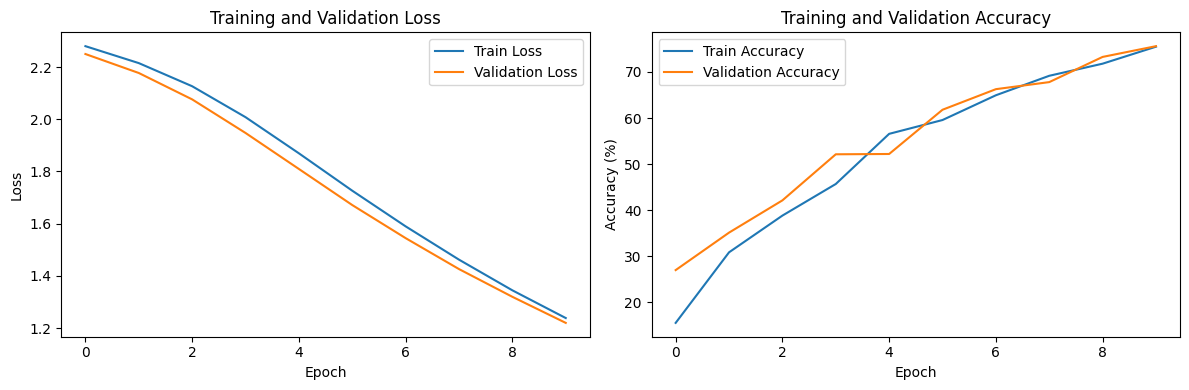


Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       153
           1       0.86      0.93      0.90       144
           2       0.85      0.85      0.85       156
           3       0.79      0.89      0.84       151
           4       0.60      0.54      0.57       151
           5       0.81      0.85      0.83       150
           6       0.67      0.68      0.68       152
           7       0.57      0.64      0.60       140
           8       0.72      0.69      0.70       150
           9       0.69      0.54      0.60       153

    accuracy                           0.76      1500
   macro avg       0.75      0.76      0.75      1500
weighted avg       0.75      0.76      0.75      1500

time: 723 ms (started: 2025-01-12 16:01:21 +00:00)


In [ ]:
# Plot training and validation curves
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

# Function to get predictions and true labels from the validation set
def get_predictions(model, val_loader, device):
    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)

            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return np.array(all_predictions), np.array(all_labels)

# Get predictions on validation set
y_pred, y_true = get_predictions(model, val_loader, device)

# Generate and print classification report for validation set
class_names = [str(i) for i in range(10)]
print("\nValidation Set Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))

### Experiment number 1

#### Model Set Up

New model with 3 hidden layers instead of one, using Relu activations and softmax output. The model uses Adam optimizer with 0.001 learning rate.
Those changes are made in order to improve base model performance.

In [ ]:
class Exp1(nn.Module):
    def __init__(self):
        super(Exp1, self).__init__()
        # First layer: 784 -> 256
        self.fc1 = nn.Linear(784, 256)
        # Second layer: 256 -> 128
        self.fc2 = nn.Linear(256, 128)
        # Third layer: 128 -> 64
        self.fc3 = nn.Linear(128, 64)
        # Output layer: 64 -> 10
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        # Using ReLU activation after each layer except the last
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize improved model
improved_model = Exp1().to(device)
criterion = nn.CrossEntropyLoss() #includes softmax
optimizer = optim.Adam(improved_model.parameters(), lr=0.001)

time: 5.6 ms (started: 2025-01-12 16:01:22 +00:00)


#### Train, Validation and Visualize

Using our previously defined training and validaion functions to train the modified model, and then visualize the results accuracies and classification set report. lastly we compare experiment 1 model accuracy with base model.


Training Experiment 1 Model...
Epoch [1/10]
Train Loss: 1.3729, Train Acc: 51.69%
Val Loss: 0.5609, Val Acc: 81.67%
--------------------------------------------------
Epoch [2/10]
Train Loss: 0.3727, Train Acc: 88.71%
Val Loss: 0.3018, Val Acc: 90.27%
--------------------------------------------------
Epoch [3/10]
Train Loss: 0.2259, Train Acc: 92.83%
Val Loss: 0.2079, Val Acc: 92.87%
--------------------------------------------------
Epoch [4/10]
Train Loss: 0.1273, Train Acc: 96.77%
Val Loss: 0.1498, Val Acc: 95.13%
--------------------------------------------------
Epoch [5/10]
Train Loss: 0.0991, Train Acc: 96.80%
Val Loss: 0.1100, Val Acc: 96.53%
--------------------------------------------------
Epoch [6/10]
Train Loss: 0.0642, Train Acc: 98.31%
Val Loss: 0.1125, Val Acc: 96.53%
--------------------------------------------------
Epoch [7/10]
Train Loss: 0.0500, Train Acc: 98.69%
Val Loss: 0.1057, Val Acc: 96.73%
--------------------------------------------------
Epoch [8/10]
Tra

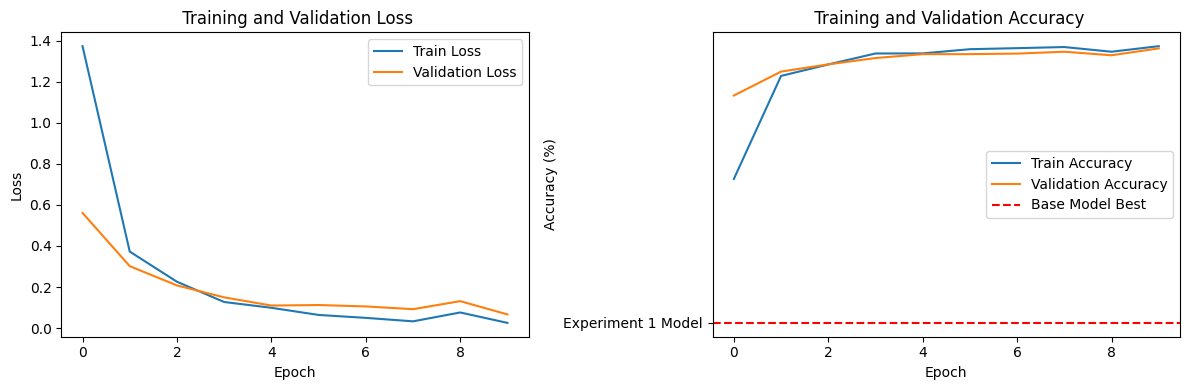


Final Validation Accuracies:
Base Model: 75.60%
Improved Experiment1 Model: 98.60%
time: 4.65 s (started: 2025-01-12 16:01:22 +00:00)


In [ ]:
def train_model(model, num_epochs=10):
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        # Training
        model.train()
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer)
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)

        # Validation
        val_loss, val_acc = validate(model, val_loader, criterion, device)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
        print('-' * 50)

    return {
        'train_losses': train_losses,
        'train_accuracies': train_accuracies,
        'val_losses': val_losses,
        'val_accuracies': val_accuracies
    }

# Function to plot training curves
def plot_training_curves(history, base_accuracy=None, title_prefix=""):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history['train_losses'], label='Train Loss')
    plt.plot(history['val_losses'], label='Validation Loss')
    plt.title(f'{title_prefix} Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['train_accuracies'], label='Train Accuracy')
    plt.plot(history['val_accuracies'], label='Validation Accuracy')
    if base_accuracy is not None:
        plt.axhline(y=base_accuracy, color='r', linestyle='--', label='Base Model Best')
    plt.title(f'{title_prefix} Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Train and evaluate Experiment 1
print("\nTraining Experiment 1 Model...")
improved_model = Exp1().to(device)
optimizer = optim.Adam(improved_model.parameters(), lr=0.001)
improved_history = train_model(improved_model)

# Get classification report for Experiment 1
y_pred, y_true = get_predictions(improved_model, val_loader, device)
print("\nExperiment 1 - Validation Set Classification Report:")
print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(10)], zero_division=0))
plot_training_curves(improved_history, "Experiment 1 Model")

# Print final validation accuracies for comparison
print("\nFinal Validation Accuracies:")
print(f"Base Model: {base_val_accuracy:.2f}%")
print(f"Improved Experiment1 Model: {max(improved_history['val_accuracies']):.2f}%")

### Experiment number 2

#### Model Set Up

#### Model Set Up

Defining second experiment with same base model architecture but allowing testing different optimize types, and later different hyperparameters.

In [ ]:
def experiment2(learning_rate, optimizer_choice):
    model = BaseModel().to(device)
    criterion = nn.CrossEntropyLoss()

    # Define the optimizer
    if optimizer_choice == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    elif optimizer_choice == 'sgd':
        optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    else:
        raise ValueError("Unsupported optimizer")

    return model, criterion, optimizer

time: 759 µs (started: 2025-01-12 16:01:27 +00:00)


#### Train and Validation

Defining similar train and validation function, but with structures to save and compare history data.

In [ ]:
def train_hyperparameter_model(model, train_loader, criterion, optimizer, epochs):
    histories = {
        'train_losses': [],
        'train_accuracies': [],
        'val_losses': [],
        'val_accuracies': []
    }

    for epoch in range(epochs):
        # Training
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer)

        # Validation
        val_loss, val_acc = validate(model, val_loader, criterion, device)

        # Store metrics
        histories['train_losses'].append(train_loss)
        histories['train_accuracies'].append(train_acc)
        histories['val_losses'].append(val_loss)
        histories['val_accuracies'].append(val_acc)

        print(f'Epoch {epoch+1}/{epochs}:')
        print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

    return histories

time: 5.04 ms (started: 2025-01-12 16:01:27 +00:00)


#### Evaluation Function

In [ ]:
def evaluate_model(model, val_loader):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate metrics
    accuracy = accuracy_score(all_labels, all_preds)
    conf_mat = confusion_matrix(all_labels, all_preds)
    class_rep = classification_report(all_labels, all_preds, zero_division=0)

    return accuracy, conf_mat, class_rep

time: 2.03 ms (started: 2025-01-12 16:01:27 +00:00)


#### Visualization

In [ ]:
def visualize_results(histories, base_accuracy=None):
    plt.figure(figsize=(15, 5))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(histories['train_losses'], label='Train Loss')
    plt.plot(histories['val_losses'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(histories['train_accuracies'], label='Train Accuracy')
    plt.plot(histories['val_accuracies'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()

time: 836 µs (started: 2025-01-12 16:01:27 +00:00)


This cell implements hyperparameters tuning experiment that tests different combinations of learning rates, batch sizes, epochs and optimizers. We store the best model at the end.


Testing Experiment 2:
Learning Rate: 0.001, Batch Size: 32, Epochs: 10, Optimizer: adam
--------------------------------------------------
Epoch 1/10:
Train Loss: 1.5210, Train Acc: 55.31%
Val Loss: 0.9519, Val Acc: 75.67%
Epoch 2/10:
Train Loss: 0.6474, Train Acc: 86.77%
Val Loss: 0.5161, Val Acc: 87.93%
Epoch 3/10:
Train Loss: 0.3824, Train Acc: 92.57%
Val Loss: 0.3496, Val Acc: 92.13%
Epoch 4/10:
Train Loss: 0.2676, Train Acc: 94.83%
Val Loss: 0.2552, Val Acc: 94.87%
Epoch 5/10:
Train Loss: 0.1894, Train Acc: 96.71%
Val Loss: 0.2103, Val Acc: 95.47%
Epoch 6/10:
Train Loss: 0.1498, Train Acc: 97.31%
Val Loss: 0.1761, Val Acc: 95.60%
Epoch 7/10:
Train Loss: 0.1143, Train Acc: 98.17%
Val Loss: 0.1434, Val Acc: 97.00%
Epoch 8/10:
Train Loss: 0.0928, Train Acc: 98.60%
Val Loss: 0.1296, Val Acc: 97.27%
Epoch 9/10:
Train Loss: 0.0754, Train Acc: 99.11%
Val Loss: 0.1226, Val Acc: 97.00%
Epoch 10/10:
Train Loss: 0.0627, Train Acc: 99.06%
Val Loss: 0.1040, Val Acc: 97.47%


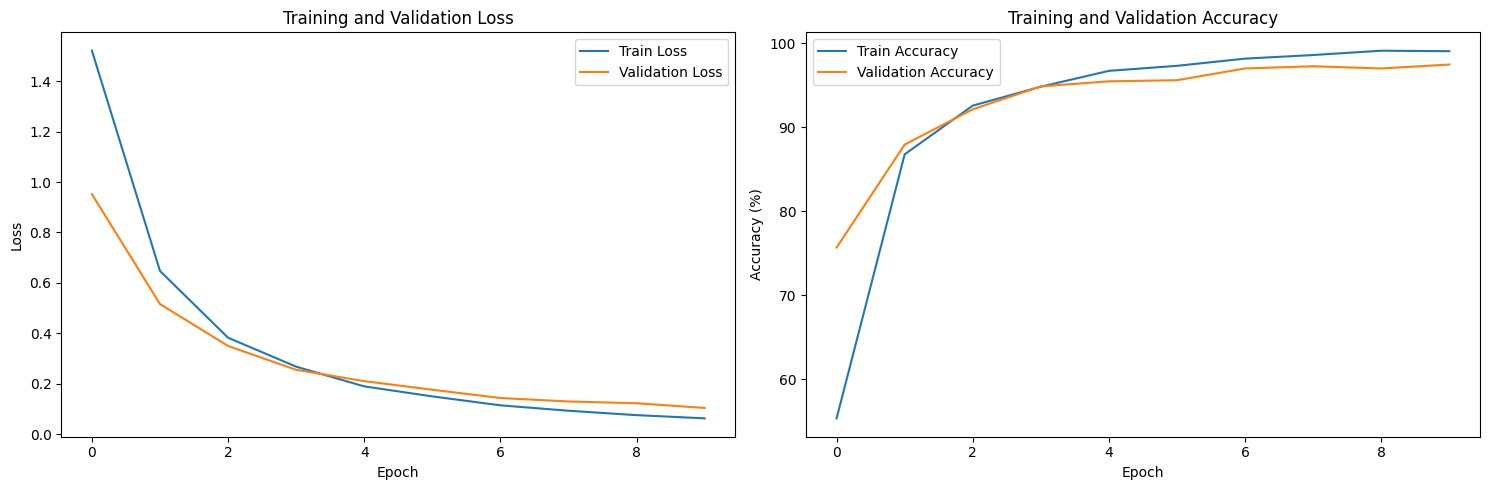


Accuracy: 97.47%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       153
           1       0.99      1.00      1.00       144
           2       1.00      1.00      1.00       156
           3       0.99      0.94      0.97       151
           4       0.94      0.97      0.96       151
           5       0.98      0.95      0.97       150
           6       0.98      0.98      0.98       152
           7       0.96      0.94      0.95       140
           8       0.94      0.99      0.96       150
           9       0.97      0.97      0.97       153

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.98      0.97      0.97      1500


Testing Experiment 2:
Learning Rate: 0.001, Batch Size: 32, Epochs: 10, Optimizer: sgd
--------------------------------------------------
Epoch 1/10:
Train Loss: 2.3008, Train Acc: 10.06%
Val Loss: 2

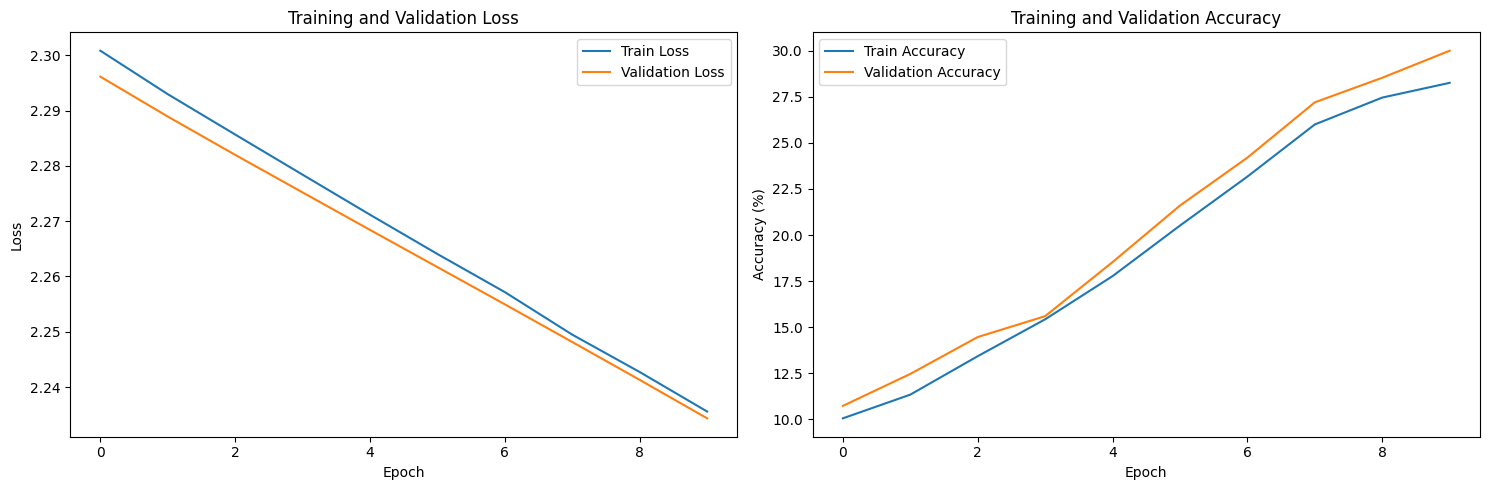


Accuracy: 30.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       153
           1       0.00      0.00      0.00       144
           2       1.00      0.01      0.01       156
           3       0.24      0.54      0.33       151
           4       0.00      0.00      0.00       151
           5       0.21      0.93      0.34       150
           6       0.00      0.00      0.00       152
           7       0.63      0.23      0.34       140
           8       0.24      0.22      0.23       150
           9       0.24      0.26      0.25       153

    accuracy                           0.30      1500
   macro avg       0.35      0.30      0.24      1500
weighted avg       0.35      0.30      0.24      1500


Testing Experiment 2:
Learning Rate: 0.001, Batch Size: 32, Epochs: 15, Optimizer: adam
--------------------------------------------------
Epoch 1/15:
Train Loss: 1.5418, Train Acc: 56.20%
Val Loss: 

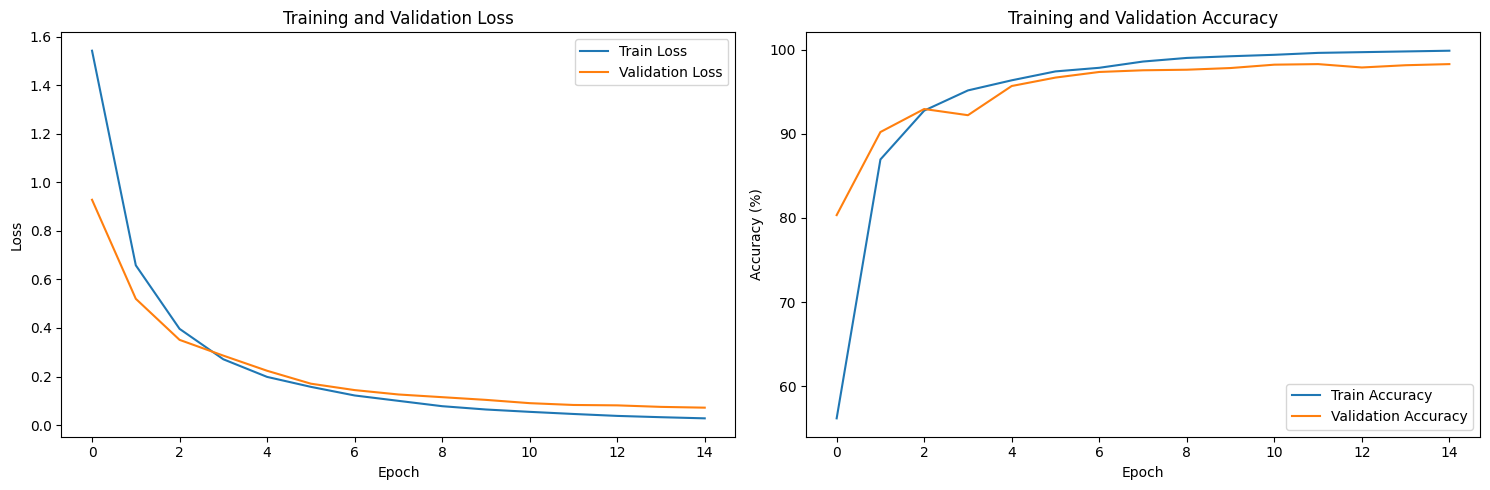


Accuracy: 98.27%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       144
           2       1.00      1.00      1.00       156
           3       1.00      0.99      0.99       151
           4       0.95      0.97      0.96       151
           5       0.95      0.97      0.96       150
           6       0.99      0.97      0.98       152
           7       0.98      0.94      0.96       140
           8       0.97      0.99      0.98       150
           9       0.99      0.99      0.99       153

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500


Testing Experiment 2:
Learning Rate: 0.001, Batch Size: 32, Epochs: 15, Optimizer: sgd
--------------------------------------------------
Epoch 1/15:
Train Loss: 2.3068, Train Acc: 10.11%
Val Loss: 2

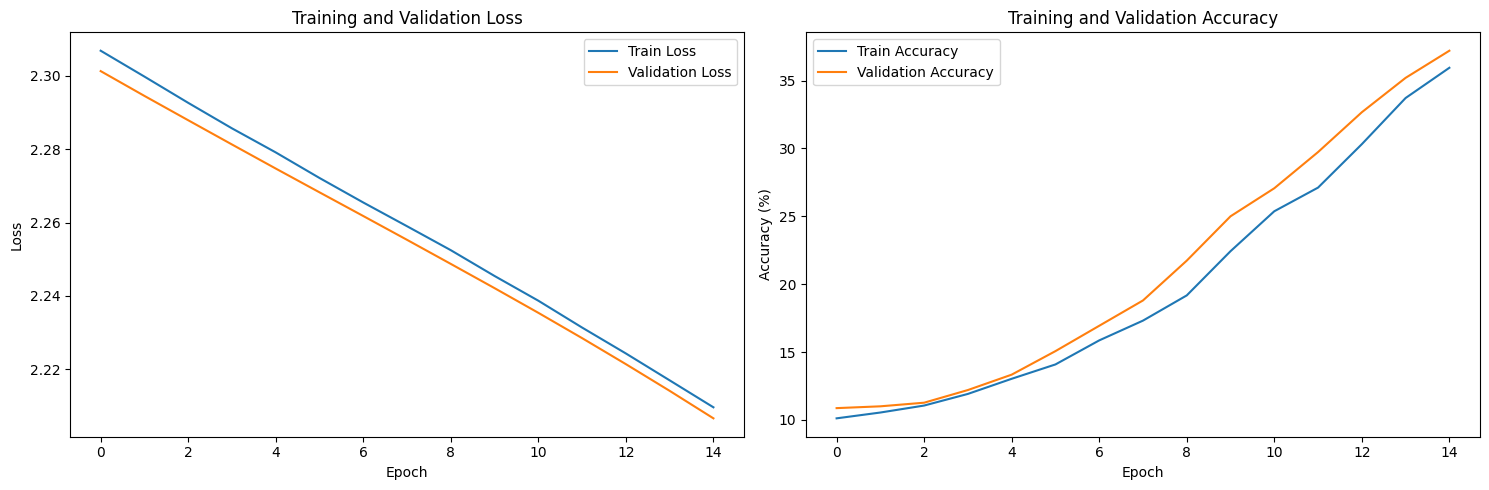


Accuracy: 37.20%
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.99      0.51       153
           1       1.00      0.01      0.03       144
           2       0.79      0.38      0.51       156
           3       0.54      0.60      0.57       151
           4       0.40      0.35      0.37       151
           5       0.31      0.66      0.42       150
           6       0.47      0.05      0.08       152
           7       0.52      0.24      0.33       140
           8       0.38      0.10      0.16       150
           9       0.19      0.31      0.24       153

    accuracy                           0.37      1500
   macro avg       0.49      0.37      0.32      1500
weighted avg       0.49      0.37      0.32      1500


Testing Experiment 2:
Learning Rate: 0.001, Batch Size: 64, Epochs: 10, Optimizer: adam
--------------------------------------------------
Epoch 1/10:
Train Loss: 1.7626, Train Acc: 49.77%
Val Loss: 

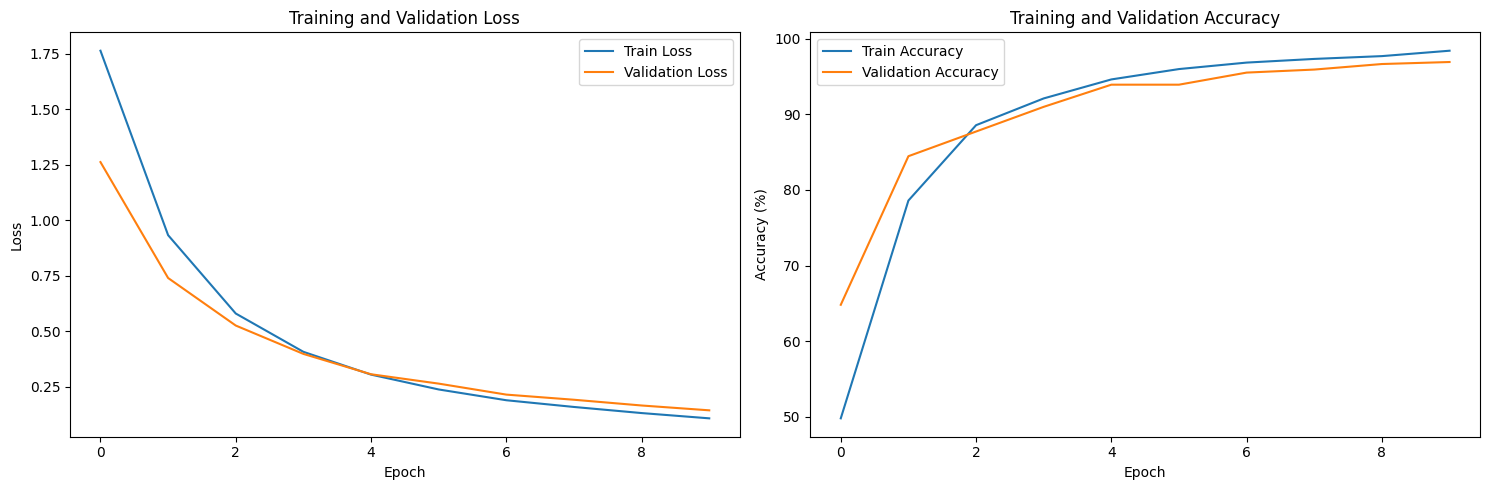


Accuracy: 96.93%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       153
           1       0.99      0.98      0.98       144
           2       1.00      0.99      0.99       156
           3       0.97      0.95      0.96       151
           4       0.95      0.95      0.95       151
           5       0.96      0.95      0.96       150
           6       0.95      0.97      0.96       152
           7       0.96      0.94      0.95       140
           8       0.94      0.99      0.96       150
           9       0.99      0.97      0.98       153

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500


Testing Experiment 2:
Learning Rate: 0.001, Batch Size: 64, Epochs: 10, Optimizer: sgd
--------------------------------------------------
Epoch 1/10:
Train Loss: 2.3037, Train Acc: 9.80%
Val Loss: 2.

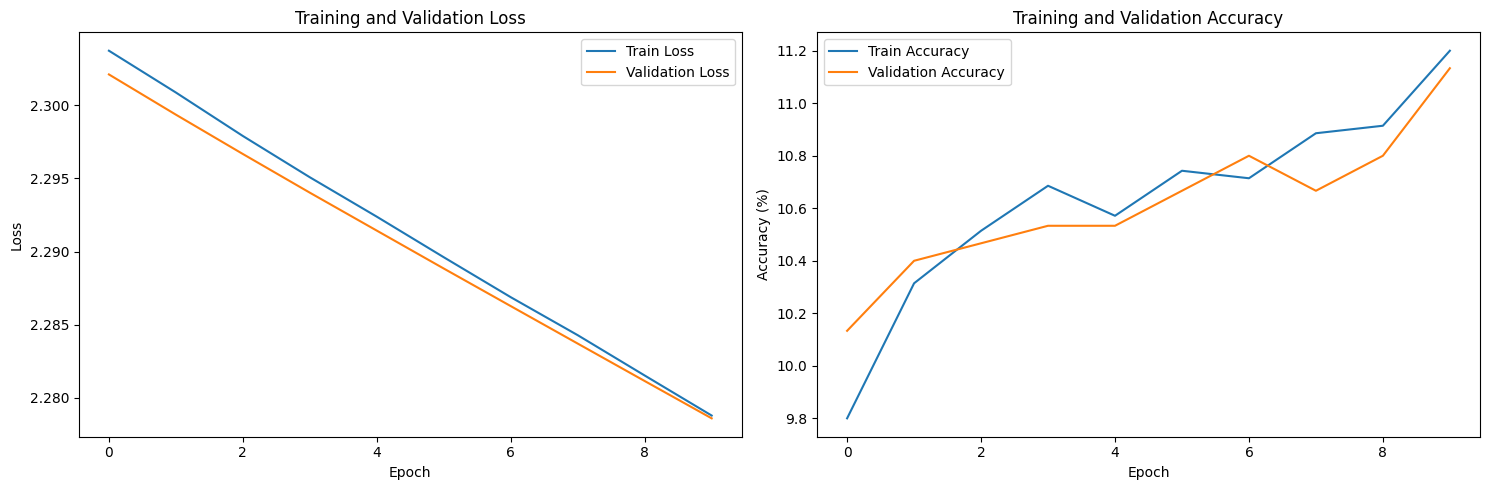


Accuracy: 11.13%
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.03      0.05       153
           1       0.40      0.01      0.03       144
           2       0.00      0.00      0.00       156
           3       0.00      0.00      0.00       151
           4       0.00      0.00      0.00       151
           5       0.00      0.00      0.00       150
           6       0.26      0.03      0.06       152
           7       0.33      0.04      0.06       140
           8       0.00      0.00      0.00       150
           9       0.10      0.99      0.19       153

    accuracy                           0.11      1500
   macro avg       0.18      0.11      0.04      1500
weighted avg       0.17      0.11      0.04      1500


Testing Experiment 2:
Learning Rate: 0.001, Batch Size: 64, Epochs: 15, Optimizer: adam
--------------------------------------------------
Epoch 1/15:
Train Loss: 1.7388, Train Acc: 51.86%
Val Loss: 

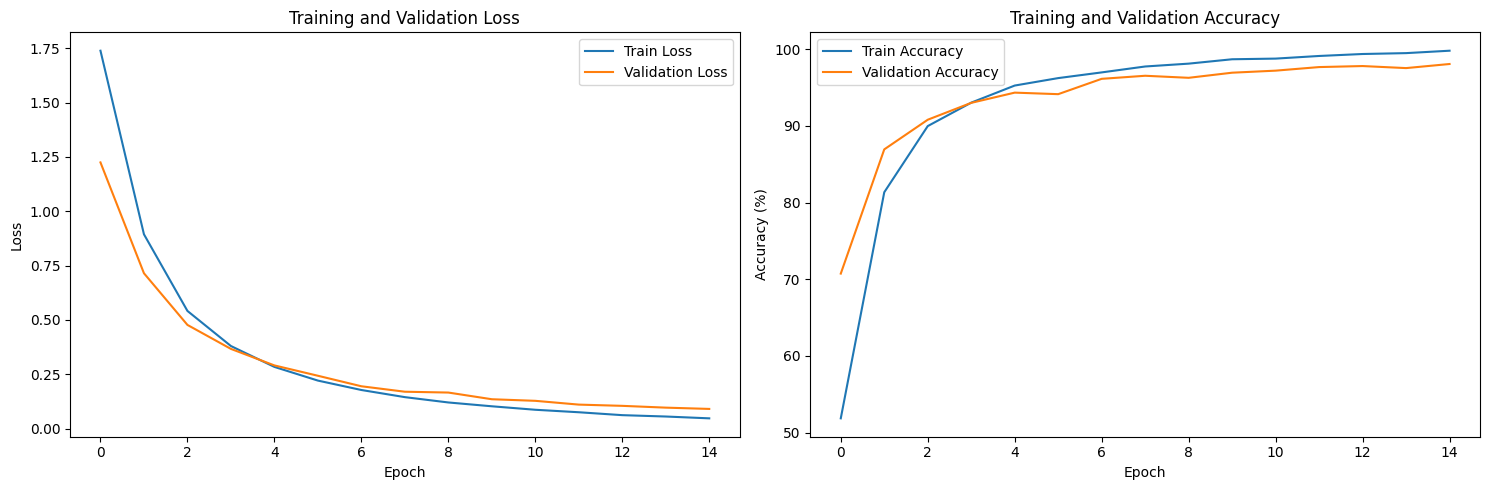


Accuracy: 98.07%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       153
           1       1.00      1.00      1.00       144
           2       1.00      1.00      1.00       156
           3       1.00      0.96      0.98       151
           4       0.94      0.97      0.96       151
           5       0.95      0.96      0.96       150
           6       0.99      0.97      0.98       152
           7       0.98      0.96      0.97       140
           8       0.97      0.99      0.98       150
           9       0.98      0.99      0.98       153

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500


Testing Experiment 2:
Learning Rate: 0.001, Batch Size: 64, Epochs: 15, Optimizer: sgd
--------------------------------------------------
Epoch 1/15:
Train Loss: 2.3038, Train Acc: 10.69%
Val Loss: 2

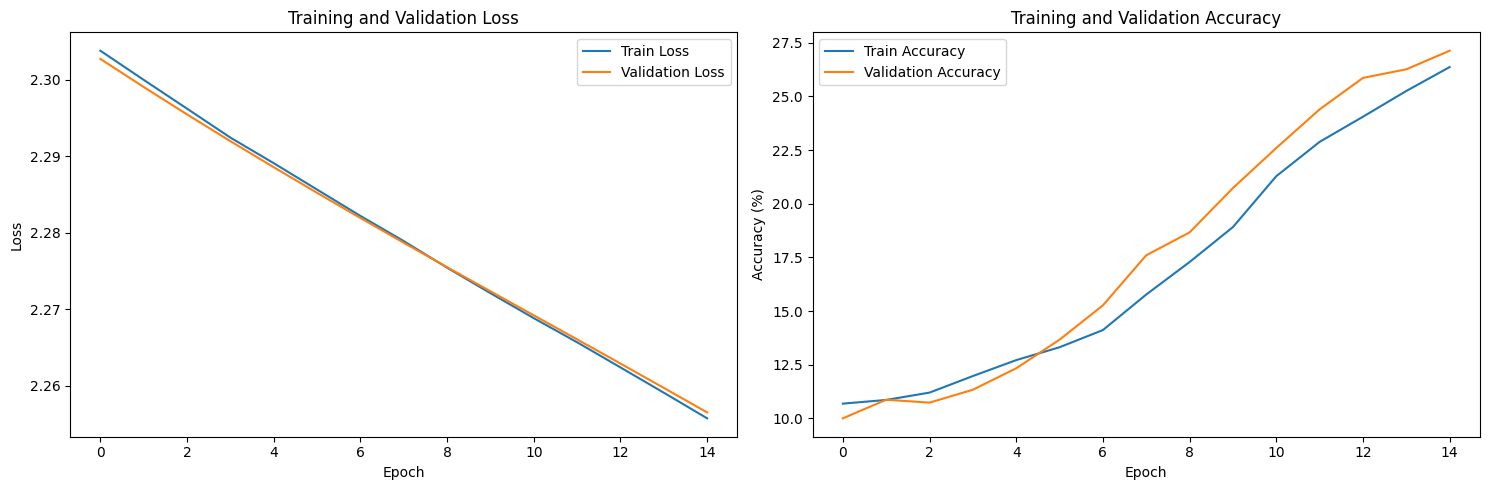


Accuracy: 27.13%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.60      0.75       153
           1       0.34      0.34      0.34       144
           2       0.78      0.16      0.27       156
           3       0.12      0.03      0.04       151
           4       0.00      0.00      0.00       151
           5       0.35      0.50      0.41       150
           6       0.00      0.00      0.00       152
           7       0.67      0.07      0.13       140
           8       0.12      0.08      0.09       150
           9       0.16      0.92      0.28       153

    accuracy                           0.27      1500
   macro avg       0.35      0.27      0.23      1500
weighted avg       0.35      0.27      0.23      1500


Testing Experiment 2:
Learning Rate: 0.01, Batch Size: 32, Epochs: 10, Optimizer: adam
--------------------------------------------------
Epoch 1/10:
Train Loss: 0.7888, Train Acc: 73.11%
Val Loss: 0

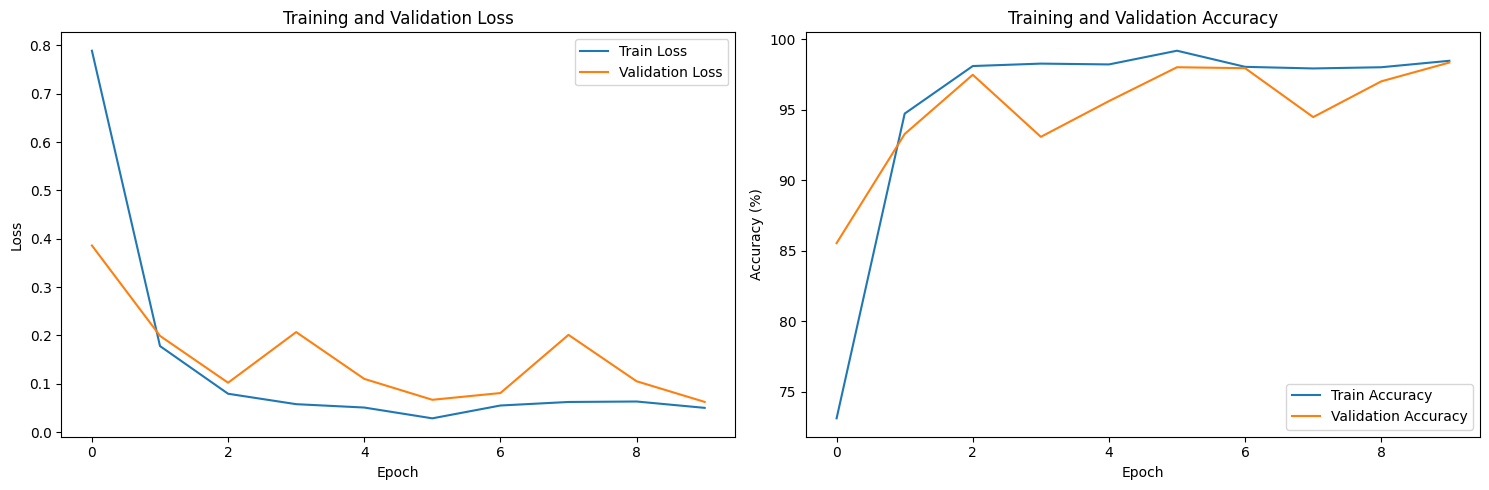


Accuracy: 98.33%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       144
           2       1.00      1.00      1.00       156
           3       0.99      1.00      0.99       151
           4       0.99      0.95      0.97       151
           5       0.97      0.98      0.97       150
           6       0.98      0.97      0.97       152
           7       0.95      0.97      0.96       140
           8       0.96      0.97      0.96       150
           9       1.00      0.99      1.00       153

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500


Testing Experiment 2:
Learning Rate: 0.01, Batch Size: 32, Epochs: 10, Optimizer: sgd
--------------------------------------------------
Epoch 1/10:
Train Loss: 2.2824, Train Acc: 14.80%
Val Loss: 2.

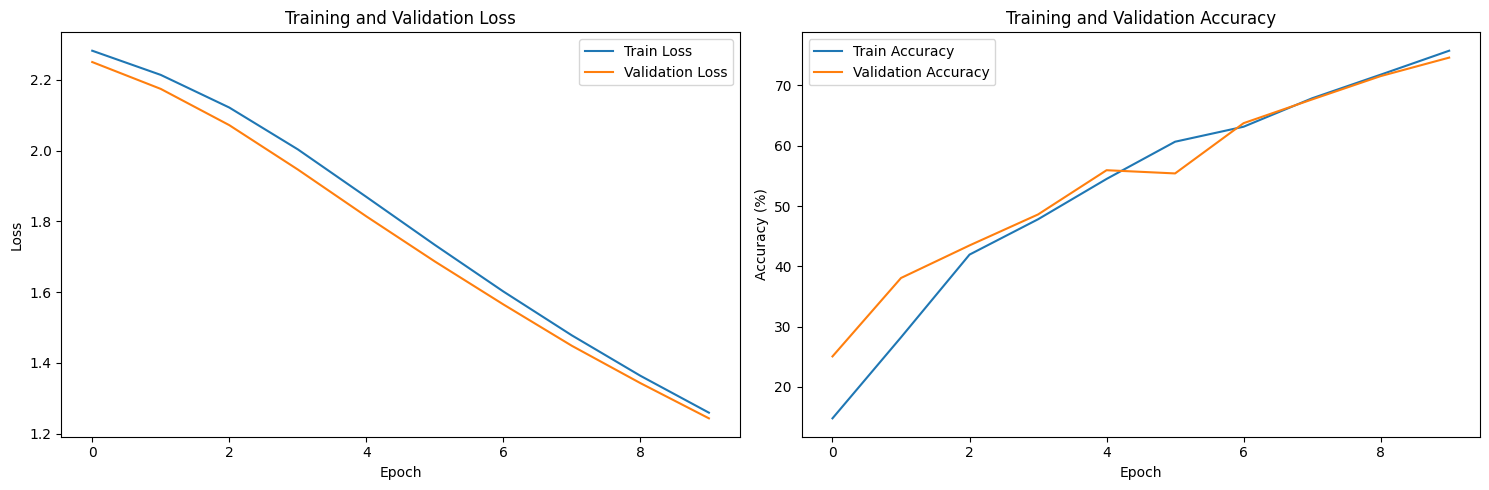


Accuracy: 74.60%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       153
           1       0.80      0.94      0.87       144
           2       0.93      0.85      0.89       156
           3       0.79      0.81      0.80       151
           4       0.70      0.49      0.58       151
           5       0.72      0.82      0.77       150
           6       0.69      0.69      0.69       152
           7       0.60      0.66      0.63       140
           8       0.71      0.59      0.64       150
           9       0.57      0.65      0.61       153

    accuracy                           0.75      1500
   macro avg       0.75      0.75      0.74      1500
weighted avg       0.75      0.75      0.74      1500


Testing Experiment 2:
Learning Rate: 0.01, Batch Size: 32, Epochs: 15, Optimizer: adam
--------------------------------------------------
Epoch 1/15:
Train Loss: 0.7966, Train Acc: 73.91%
Val Loss: 0

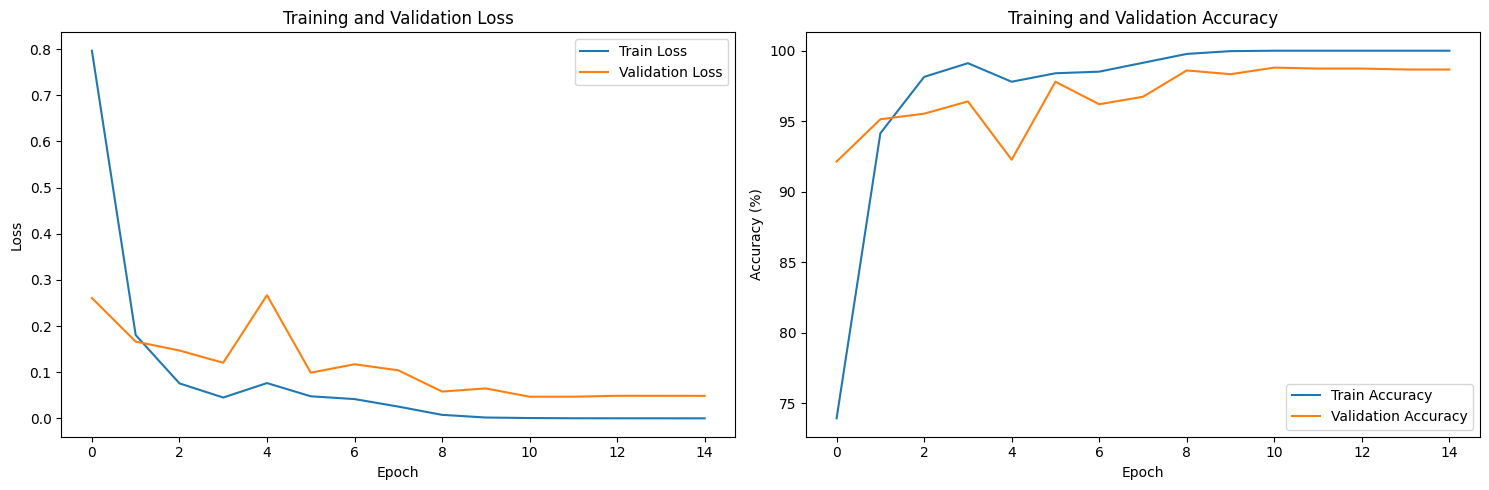


Accuracy: 98.67%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       144
           2       1.00      1.00      1.00       156
           3       1.00      1.00      1.00       151
           4       0.96      0.99      0.97       151
           5       1.00      0.97      0.98       150
           6       0.99      0.99      0.99       152
           7       0.99      0.96      0.97       140
           8       0.93      0.99      0.96       150
           9       1.00      0.97      0.98       153

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500


Testing Experiment 2:
Learning Rate: 0.01, Batch Size: 32, Epochs: 15, Optimizer: sgd
--------------------------------------------------
Epoch 1/15:
Train Loss: 2.2701, Train Acc: 19.06%
Val Loss: 2.

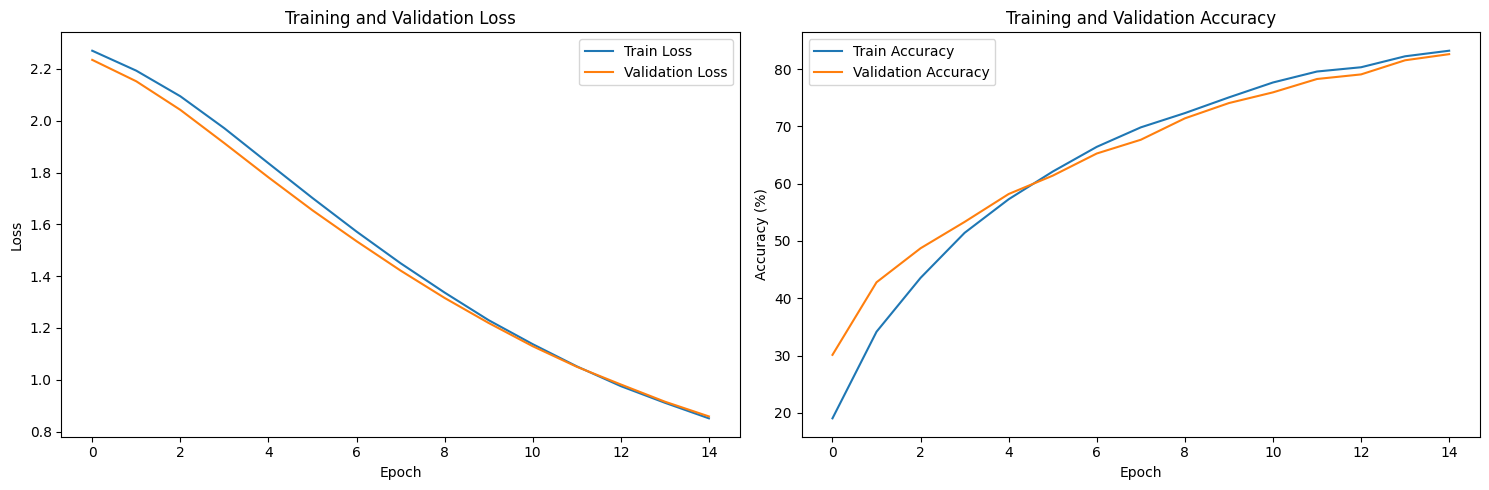


Accuracy: 82.60%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       153
           1       0.94      0.94      0.94       144
           2       0.89      0.96      0.93       156
           3       0.87      0.86      0.86       151
           4       0.73      0.60      0.66       151
           5       0.88      0.87      0.88       150
           6       0.74      0.80      0.77       152
           7       0.73      0.69      0.71       140
           8       0.84      0.75      0.79       150
           9       0.68      0.84      0.75       153

    accuracy                           0.83      1500
   macro avg       0.83      0.82      0.82      1500
weighted avg       0.83      0.83      0.82      1500


Testing Experiment 2:
Learning Rate: 0.01, Batch Size: 64, Epochs: 10, Optimizer: adam
--------------------------------------------------
Epoch 1/10:
Train Loss: 0.9524, Train Acc: 68.66%
Val Loss: 0

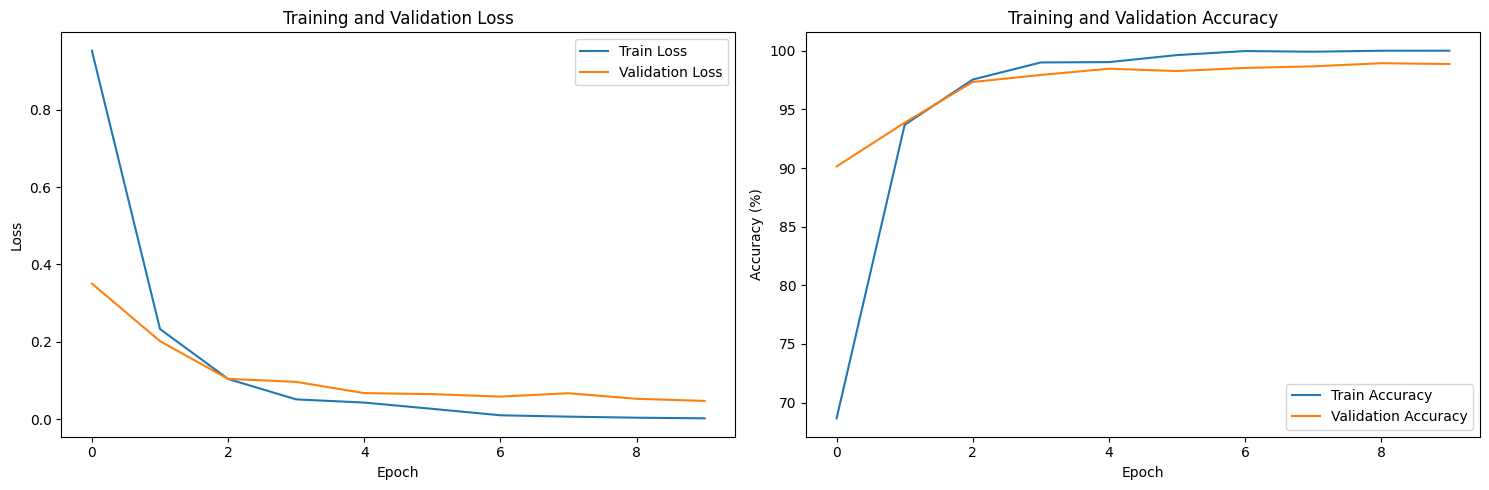


Accuracy: 98.87%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       144
           2       1.00      1.00      1.00       156
           3       0.99      0.99      0.99       151
           4       0.97      0.98      0.97       151
           5       0.99      0.97      0.98       150
           6       0.99      1.00      1.00       152
           7       0.99      0.96      0.97       140
           8       0.96      0.99      0.97       150
           9       0.99      0.99      0.99       153

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500


Testing Experiment 2:
Learning Rate: 0.01, Batch Size: 64, Epochs: 10, Optimizer: sgd
--------------------------------------------------
Epoch 1/10:
Train Loss: 2.2916, Train Acc: 13.31%
Val Loss: 2.

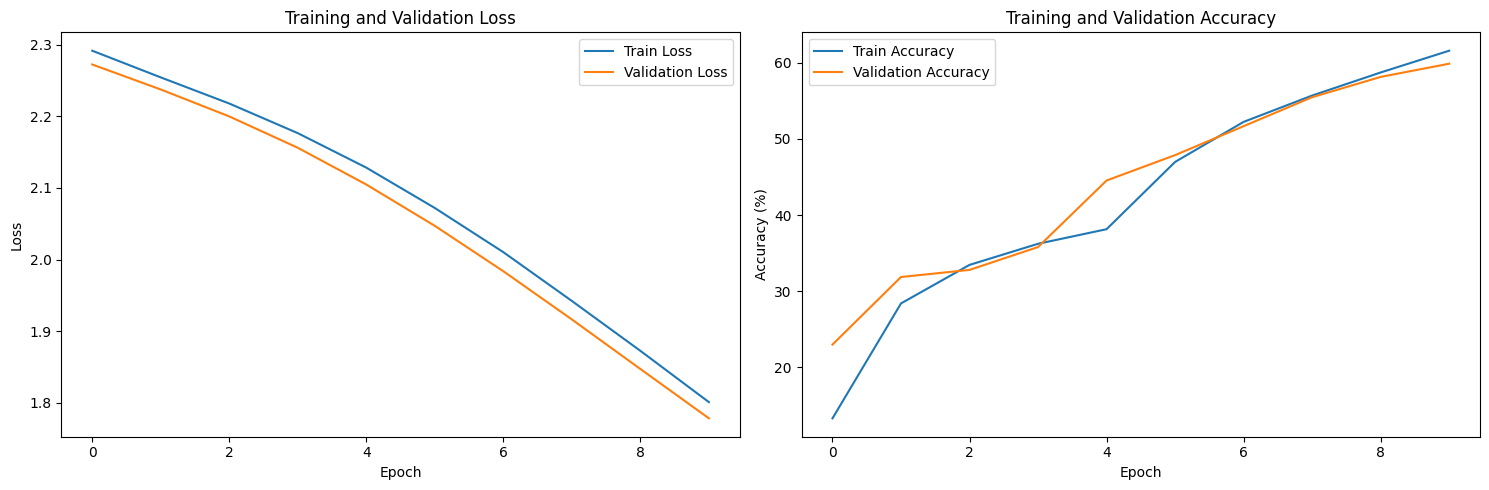


Accuracy: 59.87%
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       153
           1       0.74      0.87      0.80       144
           2       0.83      0.43      0.57       156
           3       0.75      0.60      0.66       151
           4       0.28      0.25      0.26       151
           5       0.54      0.91      0.68       150
           6       0.49      0.49      0.49       152
           7       0.47      0.55      0.51       140
           8       0.55      0.45      0.49       150
           9       0.54      0.50      0.52       153

    accuracy                           0.60      1500
   macro avg       0.61      0.60      0.59      1500
weighted avg       0.61      0.60      0.59      1500


Testing Experiment 2:
Learning Rate: 0.01, Batch Size: 64, Epochs: 15, Optimizer: adam
--------------------------------------------------
Epoch 1/15:
Train Loss: 0.9223, Train Acc: 69.46%
Val Loss: 0

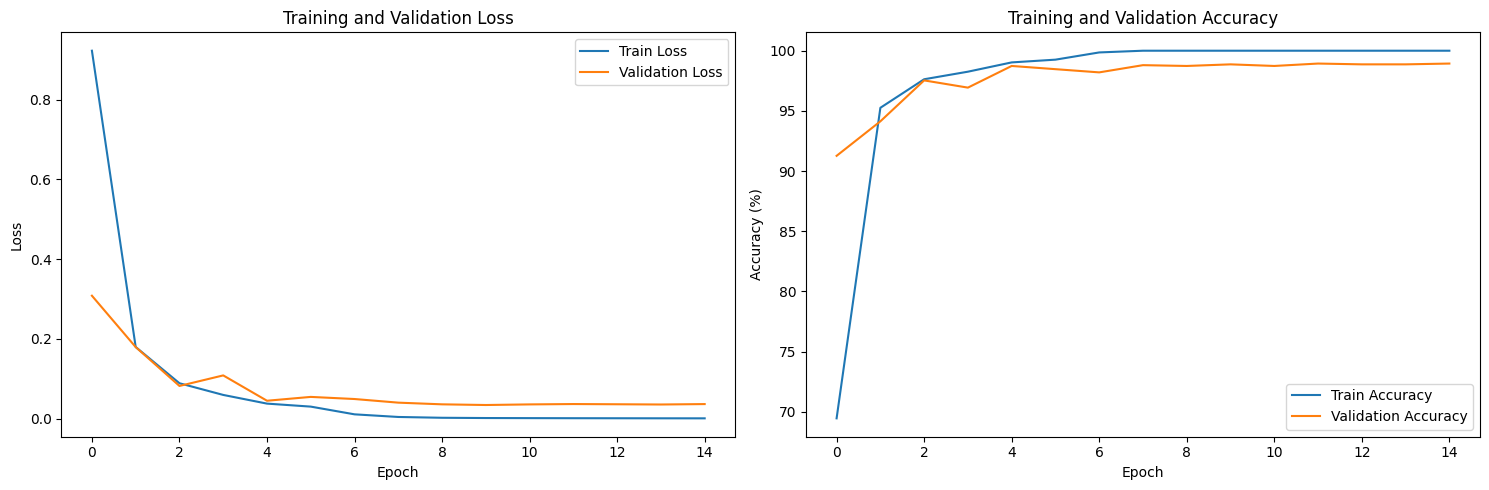


Accuracy: 98.93%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       144
           2       1.00      1.00      1.00       156
           3       1.00      0.99      1.00       151
           4       0.95      0.99      0.97       151
           5       0.99      0.97      0.98       150
           6       1.00      0.99      1.00       152
           7       0.99      0.96      0.97       140
           8       0.97      0.99      0.98       150
           9       1.00      0.99      1.00       153

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500


Testing Experiment 2:
Learning Rate: 0.01, Batch Size: 64, Epochs: 15, Optimizer: sgd
--------------------------------------------------
Epoch 1/15:
Train Loss: 2.2911, Train Acc: 13.54%
Val Loss: 2.

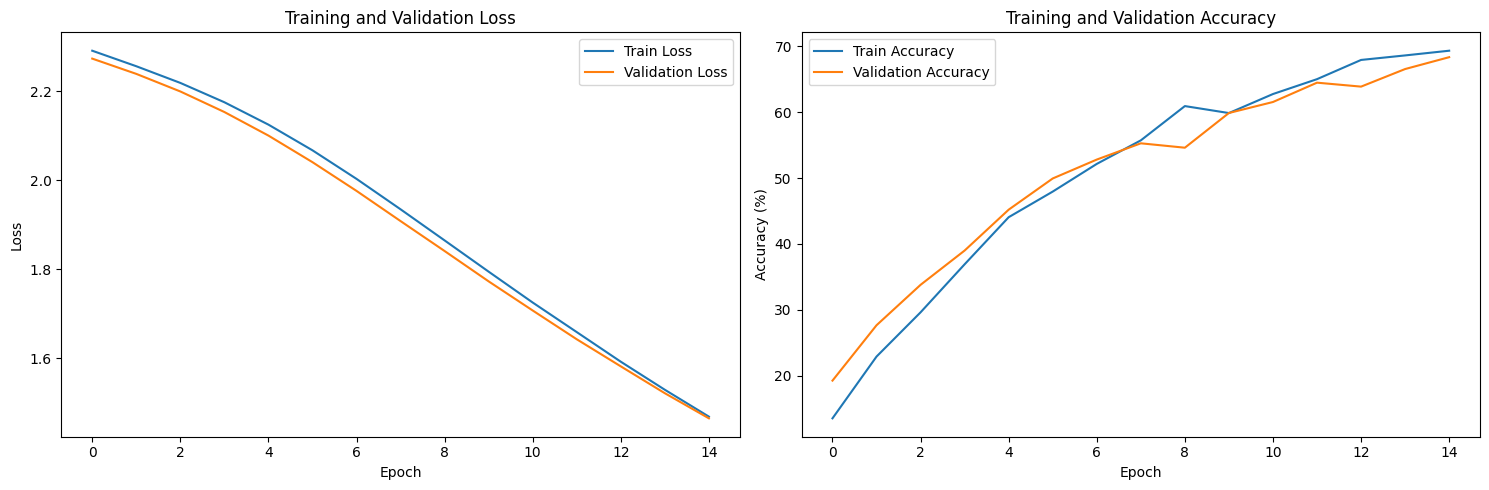


Accuracy: 68.33%
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       153
           1       0.71      0.85      0.77       144
           2       0.86      0.65      0.74       156
           3       0.69      0.80      0.74       151
           4       0.63      0.43      0.51       151
           5       0.75      0.80      0.78       150
           6       0.61      0.61      0.61       152
           7       0.45      0.73      0.56       140
           8       0.76      0.47      0.58       150
           9       0.59      0.55      0.57       153

    accuracy                           0.68      1500
   macro avg       0.70      0.68      0.68      1500
weighted avg       0.70      0.68      0.68      1500


Results Summary:
Base Model Best Validation Accuracy: 75.60%

Best Configuration:
Learning Rate: 0.01
Batch Size: 64
Epochs: 15
Optimizer: adam
Accuracy: 98.93%
time: 51.3 s (started: 2025-01-12 16:0

In [ ]:
def run_hyperparameter_experiment(learning_rates, batch_sizes, num_epochs, optimizers, base_accuracy=None):
    results = []
    best_accuracy = 0
    best_model_state = None

    for lr, bs, ep, opt in itertools.product(learning_rates, batch_sizes, num_epochs, optimizers):
        print(f"\nTesting Experiment 2:")
        print(f"Learning Rate: {lr}, Batch Size: {bs}, Epochs: {ep}, Optimizer: {opt}")
        print("-" * 50)

        # Setup model and data loaders
        model, criterion, optimizer = experiment2(lr, opt)
        train_loader = DataLoader(train_dataset, batch_size=bs, shuffle=True)

        # Train model
        histories = train_hyperparameter_model(model, train_loader, criterion, optimizer, ep)

        # Evaluate model
        accuracy, conf_mat, class_rep = evaluate_model(model, val_loader)

        # Store results
        current_result = {
            'config': {'lr': lr, 'batch_size': bs, 'epochs': ep, 'optimizer': opt},
            'accuracy': accuracy,
            'histories': histories,
            'class_report': class_rep
        }
        results.append(current_result)

        # Track best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model_state = model

        # Visualize this configuration's results
        visualize_results(histories, base_accuracy)

        print(f"\nAccuracy: {accuracy * 100:.2f}%")
        print(f"Classification Report:\n{class_rep}")

    return results, best_model_state


hyperparameter_configs = {
    'learning_rates': [0.001, 0.01],
    'batch_sizes': [32, 64],
    'num_epochs': [10, 15],
    'optimizers': ['adam', 'sgd']
}

results, best_model_state = run_hyperparameter_experiment(**hyperparameter_configs, base_accuracy=base_val_accuracy)

# Display top result
sorted_results = sorted(results, key=lambda x: x['accuracy'], reverse=True) #sort by accuracy
print("\nResults Summary:")
print(f"Base Model Best Validation Accuracy: {base_val_accuracy:.2f}%")
best_result = sorted_results[0]  #get first element(sorted by accuracy)
config = best_result['config']
print(f"\nBest Configuration:")
print(f"Learning Rate: {config['lr']}")
print(f"Batch Size: {config['batch_size']}")
print(f"Epochs: {config['epochs']}")
print(f"Optimizer: {config['optimizer']}")
print(f"Accuracy: {best_result['accuracy'] * 100:.2f}%")


### Save Trained model (your best model)
Read about Save and load models in pytorch here: [https://pytorch.org/tutorials/beginner/saving_loading_models.html](https://pytorch.org/tutorials/beginner/saving_loading_models.html)



Saving our best performing model configuration include weights into .pth file.

In [ ]:
# Get the best result from sorted_results
best_result = sorted_results[0]
best_config = best_result['config']
best_accuracy = best_result['accuracy']

# Create directory if it doesn't exist
os.makedirs('model_weights', exist_ok=True)

# Save the model and its configuration
save_path = f'model_weights/best_model.pth'
torch.save({
    'model_state_dict': best_model_state.state_dict(),
    'config': best_config,
    'accuracy': best_accuracy
}, save_path)

print(f"Best model saved to {save_path}")
print(f"Configuration: LR={best_config['lr']}, Batch Size={best_config['batch_size']}, "
      f"Epochs={best_config['epochs']}, Optimizer={best_config['optimizer']}")
print(f"Accuracy: {best_accuracy*100:.2f}%")

Best model saved to model_weights/best_model.pth
Configuration: LR=0.01, Batch Size=64, Epochs=15, Optimizer=adam
Accuracy: 98.93%
time: 5.28 ms (started: 2025-01-12 16:05:39 +00:00)


## Test Environment (of part 2 only)
This part is meant to show the tester how your model is performing. Keep in mind that the only cells he is going to run are the cells below.<br>
(If there are libraries that need to be used please add their import. If there is a process that the data has to go through before it enters the model, don't forget to add it as well).

### Load trained model

In [ ]:
# Loading the best model
checkpoint = torch.load('model_weights/best_model.pth')
model, criterion, optimizer = experiment2(
    learning_rate=checkpoint['config']['lr'],
    optimizer_choice=checkpoint['config']['optimizer']
)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

<ipython-input-40-3ec753030590>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('model_weights/best_model.pth')


BaseModel(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

time: 9.69 ms (started: 2025-01-12 16:06:00 +00:00)


### Single prediction
Let the tester examine your trained model on single predicttion test.<br>You will use the colab.file library to allow the tester to upload a single npy file of an Sign Language Digit (28x28 image as npy).<br>
Then build a function that takes this image, loads the weights of the trained model (If you haven't loaded it before), show the image and prints a prediction.

In [ ]:
import torch
from numpy import load as load_npy
from google.colab import files
import sys
from io import StringIO
import os

# Clean the print to be clearly
old_stdout = sys.stdout
sys.stdout = StringIO()
uploaded_files = files.upload()
sys.stdout = old_stdout

time: 22.7 s (started: 2025-01-12 16:06:07 +00:00)


In this cell we test the best model performance on uploaded new data examples.
We perfomed preprocessing similar to training, letting the model make prediction and visualize the results with image display (green font means a true prediction) and overall statistics at the end.

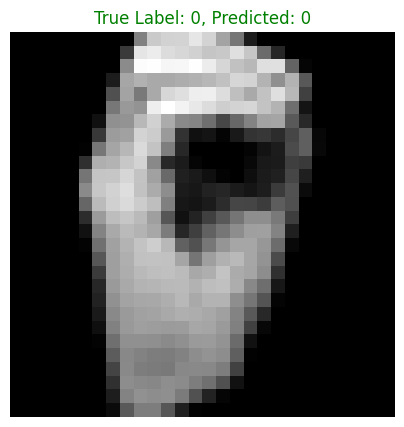

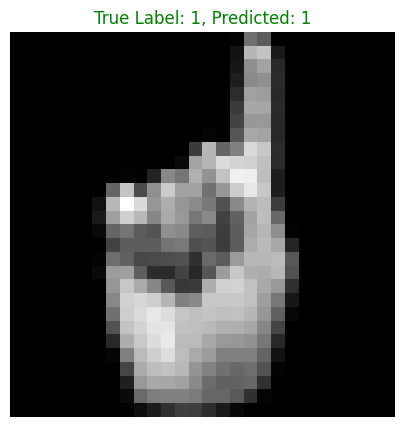

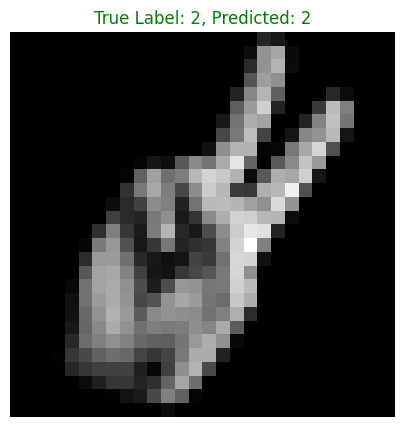

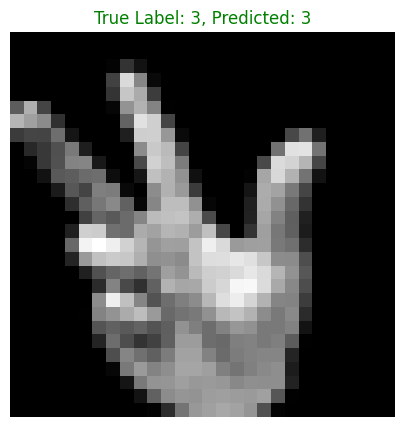

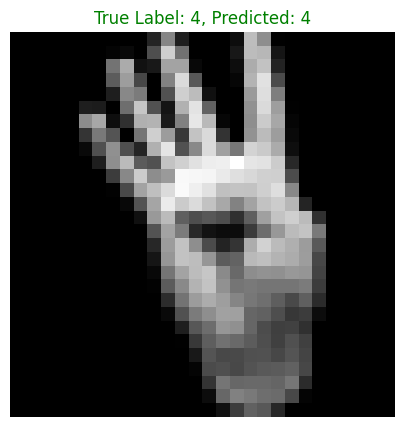

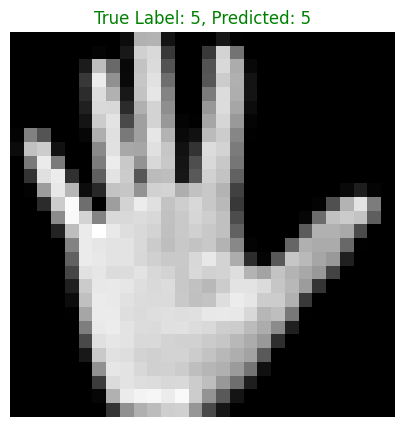

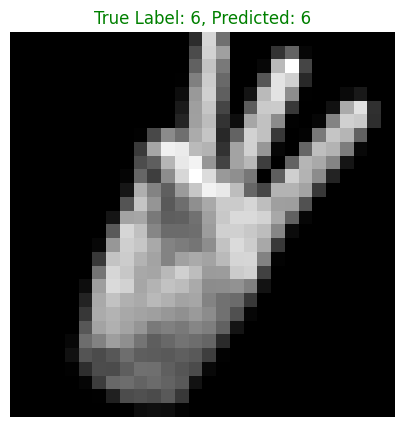

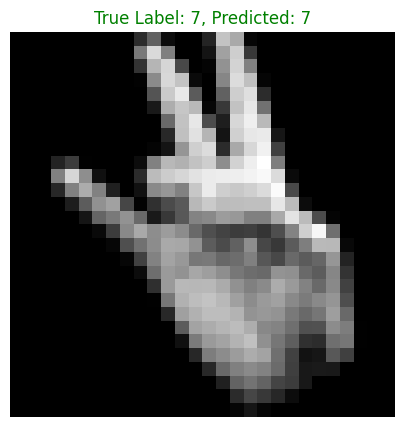

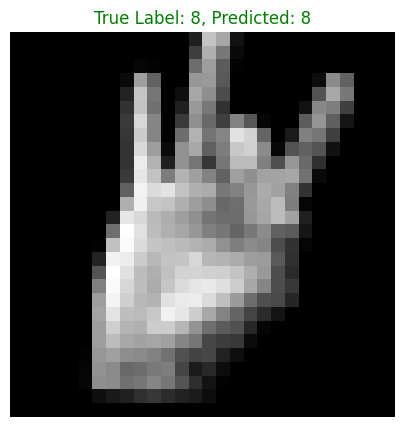

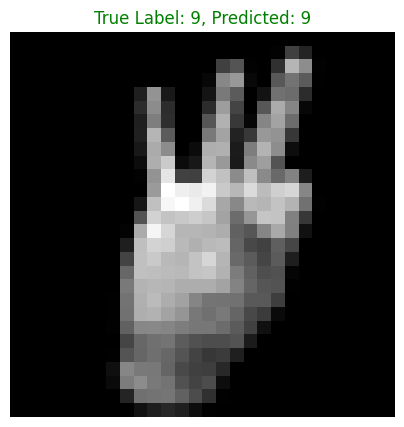

Total images: 10
Correct predictions: 10
Incorrect predictions: 0
Success rate: 100.00%
time: 1.01 s (started: 2025-01-12 16:03:39 +00:00)


In [ ]:
import glob

correct_predictions = 0
incorrect_predictions = 0

for filename in uploaded_files:
    data = load_npy(filename)

    # Reshape the image for display
    image_display = data.reshape(28, 28)

    # Display the image
    plt.figure(figsize=(5, 5))
    plt.imshow(image_display, cmap='gray')

    # Preprocess the image - normalize it like we did in training
    data = data / 255.0  # Normalize to [0,1] range

    # Keep image as flattened array (784,) for model input
    image_tensor = torch.FloatTensor(data).unsqueeze(0).to(device)  # shape: [1, 784]

    with torch.no_grad():
        outputs = model(image_tensor)
        _, predicted = torch.max(outputs, 1)

    # Get the true label from filename (0_example.npy -> 0)
    true_label = int(filename.split('_')[0])

    # Set the title color based on prediction correctness
    title_color = 'green' if true_label == predicted.item() else 'red'

    plt.title(f'True Label: {true_label}, Predicted: {predicted.item()}', color=title_color)
    plt.axis('off')
    plt.show()

    # Update the counts of correct and incorrect predictions
    if true_label == predicted.item():
        correct_predictions += 1
    else:
        incorrect_predictions += 1

# Print the number of correct and incorrect predictions
print(f'Total images: {len(uploaded_files)}')
print(f'Correct predictions: {correct_predictions}')
print(f'Incorrect predictions: {incorrect_predictions}')

total_images = len(uploaded_files)
success_percentage = (correct_predictions / total_images) * 100
print(f'Success rate: {success_percentage:.2f}%')
